In [2]:
#导入相应的库
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np  
import itertools
import os
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Concatenate
import sys

#导入相应的库
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np  
import itertools
import os

#设置图片的高和宽，一次训练所选取的样本数，迭代次数
im_height = 224
im_width = 224
batch_size = 94
epochs = 30


image_path = "/Users/jiangshihua/Desktop/cuochuang 1/"  # 红细胞数据集路径
train_dir = image_path + "training/training"  #训练集路径
validation_dir = image_path + "validation/validation" #验证集路径

# 定义训练集图像生成器，并进行图像增强
train_image_generator = ImageDataGenerator( rescale=1./255, # 归一化
                                            rotation_range=40, #旋转范围
                                            width_shift_range=0.2, #水平平移范围
                                            height_shift_range=0.2, #垂直平移范围
                                           shear_range=0.2, #剪切变换的程度
                                            zoom_range=0.2, #剪切变换的程度
                                            fill_mode='nearest')
                                            
# 使用图像生成器从文件夹train_dir中读取样本，对标签进行one-hot编码
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir, #从训练集路径读取图片
                                                           batch_size=batch_size, #一次训练所选取的样本数
                                                           shuffle=True, #打乱标签
                                                           target_size=(im_height, im_width), #图片resize到224x224大小
                                                           class_mode='categorical') #one-hot编码
                                                           
# 训练集样本数        
total_train = train_data_gen.n 

# 定义验证集图像生成器，并对图像进行预处理
validation_image_generator = ImageDataGenerator(rescale=1./255) # 归一化

# 使用图像生成器从验证集validation_dir中读取样本
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,#从验证集路径读取图片
                                                              batch_size=batch_size, #一次训练所选取的样本数
                                                              shuffle=False,  #不打乱标签
                                                              target_size=(im_height, im_width), #图片resize到224x224大小
                                                              class_mode='categorical') #one-hot编码
                                                              
# 验证集样本数      
total_val = val_data_gen.n



Found 2741 images belonging to 4 classes.
Found 483 images belonging to 4 classes.


In [3]:
from keras.callbacks import ReduceLROnPlateau
#from keras.callbacks import EarlyStopping
Reduce=ReduceLROnPlateau(monitor='val_accuracy',
                         factor=0.1,
                         patience=5,
                         verbose=1,
                         mode='auto',
                         epsilon=0.0001,
                         cooldown=0,
                         min_lr=0)

In [4]:
# # # 定义第一个模型 InceptionV3
# def model1():
#     base_model_1 = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False)
#     model = tf.keras.Model(inputs=base_model_1.input, outputs=base_model_1.output)
#     return base_model_1,model

# # # 定义第一个模型 InceptionV3
# def model1():
#     base_model_1 = tf.keras.applications.VGG19(weights='imagenet',include_top=False)
#     model = tf.keras.Model(inputs=base_model_1.input, outputs=base_model_1.output)
#     return base_model_1,model

# # 定义第一个模型 InceptionV3
def model1():
    base_model_1 = tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False)
    model = tf.keras.Model(inputs=base_model_1.input, outputs=base_model_1.output)
    return base_model_1,model

# # 定义第二个模型  InceptionResNetV2
# def model1():
#     base_model_1 = tf.keras.applications.InceptionResNetV2(weights='imagenet',include_top=False)
#     model = tf.keras.Model(inputs=base_model_1.input, outputs=base_model_1.output)
#     return base_model_1,model

# # 定义第二个模型  InceptionResNetV2
# def model2():
#     base_model_2 = tf.keras.applications.NASNetLarge(weights='imagenet',include_top=False)
#     model = tf.keras.Model(inputs=base_model_2.input, outputs=base_model_2.output)
#     return base_model_2,model

# # 定义第二个模型  InceptionResNetV2
# def model2():
#     base_model_2 = tf.keras.applications.Xception(weights='imagenet',include_top=False)
#     model = tf.keras.Model(inputs=base_model_2.input, outputs=base_model_2.output)
#     return base_model_2,model

# # 定义第二个模型  InceptionResNetV2
# def model2():
#     base_model_2 = tf.keras.applications.ResNet152V2(weights='imagenet',include_top=False)
#     model = tf.keras.Model(inputs=base_model_2.input, outputs=base_model_2.output)
#     return base_model_2,model

# 定义第二个模型  InceptionResNetV2
def model2():
    base_model_2 = tf.keras.applications.DenseNet201(weights='imagenet',include_top=False)
    model = tf.keras.Model(inputs=base_model_2.input, outputs=base_model_2.output)
    return base_model_2,model

#模型拼接
inp = tf.keras.Input((224,224,3))
base_model_1,model_1 = model1()
base_model_2,model_2 = model2()
r1 = model_1(inp)
r2 = model_2(inp)
# print("----------")
# print("r1:"+str(r1))
# print("r2:"+str(r2))
# print("r1.shape:"+str(r1.shape))
# print("r2.shape:"+str(r2.shape))

# r1 = tf.reshape(r1,(-1,5,5,-1))
# r2 = tf.reshape(r2,(-1,5,5,-1))
# # r1 = tf.nn.local_response_normalization(r1)
# # r2 = tf.nn.local_response_normalization(r2)
print("----------")
print("r1:"+str(r1))
print("r2:"+str(r2))
print("r1.shape:"+str(r1.shape))
print("r2.shape:"+str(r2.shape))
concatenated = Concatenate()([r1,r2])

#构建模型
x = tf.keras.layers.GlobalAveragePooling2D()(concatenated)# 加入全局平均池化层
x = tf.keras.layers.Dropout(0.5)(x)# 加入一个Dropout层
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)# 加入输出层（4分类）
model = tf.keras.Model(inputs=inp, outputs=predictions)
model.summary() # 打印每层参数信息


# 冻结前面的层，训练最后20层
for layers in base_model_1.layers[:-20]:
    layers.trainable = False

for layers in base_model_2.layers[:-20]:
    layers.trainable = False

    
#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #使用adam优化器，学习率为0.0001
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), #交叉熵损失函数
              metrics=["accuracy"]) #评价函数

2022-07-31 21:40:20.323496: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


----------
r1:KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1280), dtype=tf.float32, name=None), name='model/out_relu/Relu6:0', description="created by layer 'model'")
r2:KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1920), dtype=tf.float32, name=None), name='model_1/relu/Relu:0', description="created by layer 'model_1'")
r1.shape:(None, 7, 7, 1280)
r2.shape:(None, 7, 7, 1920)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, None, None,   2257984     ['input_1[0][0]']              

In [ ]:
history = model.fit(x=train_data_gen,   #输入训练集
                    steps_per_epoch=total_train // batch_size, #一个epoch包含的训练步数
                    epochs=epochs, #训练模型迭代次数
                    validation_data=val_data_gen,  #输入验证集
                    validation_steps=total_val // batch_size,
                   callbacks=[Reduce]) #一个epoch包含的训练步数

# 记录训练集和验证集的准确率和损失值
history_dict = history.history
train_loss = history_dict["loss"] #训练集损失值
train_accuracy = history_dict["accuracy"] #训练集准确率
val_loss = history_dict["val_loss"] #验证集损失值
val_accuracy = history_dict["val_accuracy"] #验证集准确率


Epoch 1/30
29/29 [==============================] - 696s 24s/step - loss: 1.5909 - accuracy: 0.5440 - val_loss: 15.6781 - val_accuracy: 0.3362 - lr: 0.0100
Epoch 2/30
29/29 [==============================] - 680s 23s/step - loss: 0.6641 - accuracy: 0.7340 - val_loss: 10.1738 - val_accuracy: 0.4298 - lr: 0.0100
Epoch 3/30
29/29 [==============================] - 631s 22s/step - loss: 0.5569 - accuracy: 0.7892 - val_loss: 23.8356 - val_accuracy: 0.3787 - lr: 0.0100
Epoch 4/30
 6/29 [=====>........................] - ETA: 16:18 - loss: 0.4112 - accuracy: 0.8528

In [ ]:
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

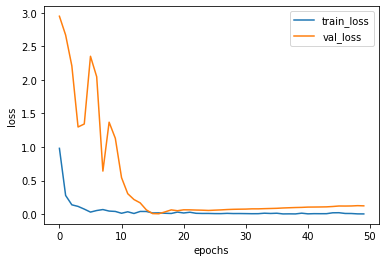

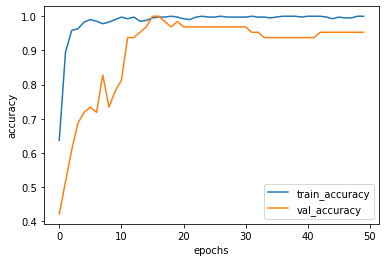

In [77]:
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()